# Hopfield Network Model of Associative Memory

- See 
[Neuronal Dynamics by Gerstner - Chapter 17 Section 3](https://neuronaldynamics.epfl.ch/online/Ch17.S2.html) for an introduction to Hopfield networks.


- The exercise is adapted from [here](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

## Exercise 1 - Introduction to Hopfield Networks

Here, neurons are pixels and take the values of -1 (*off*) or +1 (*on*). The network can store a certain number of pixel patterns, which is to be investigated in this exercise. During a retrieval phase, the network is started with some initial configuration and the network dynamics evolves towards the stored pattern (attractor) which is closest to the initial configuration.

The dynamics is that of equation:

$$S_i(t+1)=sgn\left(\sum_jw_{ij}S_j(t)\right)$$

In the Hopfield model each neuron is connected to every other neuron (full connectivity). The connection matrix is

$$w_{ij} = \frac{1}{N}\sum_{\mu} p_i^\mu p_j^\mu$$

where N is the number of neurons, $p_i^\mu$ is the value of neuron $i$ in pattern number $\mu$ and the sum runs over all patterns from $\mu = 1$ to $\mu=P$. This is a simple correlation based learning rule (Hebbian learning). Since it is not a iterative rule it is sometimes called one-shot learning. The learning rule works best if the patterns that are to be stored are random patterns with equal probability for on (+1) and off (-1). In a large networks (N to infinity) the number of random patterns that can be stored is approximately 0.14 times N.


Hopfield networks can be analyzed mathematically. In this Python exercise we focus on visualization and simulation to develop our intuition about Hopfield dynamics.

1. We provide a couple of functions to easily create patterns, store them in the network and visualize the network dynamics. Check the modules `hopfield_network.network`, `hopfield_network.pattern_tools` and `hopfield_network.plot_tools` to learn the building blocks we provide.

In [16]:
from neurodynex.hopfield_network import network
from neurodynex.hopfield_network import pattern_tools
from neurodynex.hopfield_network import plot_tools

2. Run the following code. Read the inline comments and check the documentation. The patterns and the flipped pixels are randomly chosen. Therefore the result changes every time you execute this code. Run it several times and change some parameters like nr_patterns and nr_of_flips.

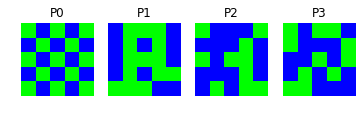

In [29]:
%matplotlib inline
pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

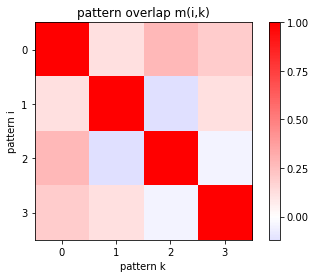

In [30]:
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)  # pairwise scalar product of flattened vectors
plot_tools.plot_overlap_matrix(overlap_matrix)

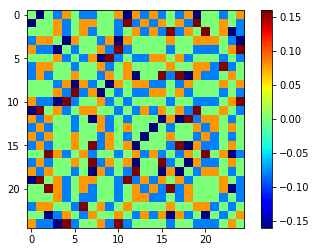

In [31]:
# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)  # apply equation w_ij
plot_tools.plot_nework_weights(hopfield_net) # visualizes the connectivity matrix hopfield_net.weights

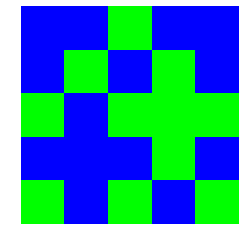

In [50]:
# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)
plot_tools.plot_pattern(hopfield_net.state.reshape(5, 5)) # initial state of binary neurons

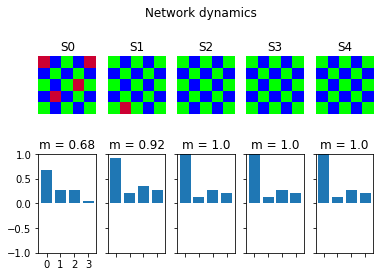

In [51]:
# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)  # apply equation S_i
# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


## Exercise 2 - $N=4\times 4$ Hopfield-network

We study how a network stores and retrieve patterns. Using a small network of only 16 neurons allows us to have a close look at the network weights and dynamics.

**Storing a single pattern.**

Modify the Python code given above to implement this exercise:

1.  Create a network with N=16 neurons.
2.  Create a single 4 by 4 checkerboard pattern.
3.  Store the checkerboard in the network.
4.  Set the initial state of the network to a noisy version of the checkerboard (nr\_flipped\_pixels = 5).
5.  Let the network dynamics evolve for 4 iterations.
6.  Plot the sequence of network states along with the overlap of network state with the checkerboard.
7. Now test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at `nr_flipped_pixels = 8`, what if `nr_flipped_pixels > 8`?

In [65]:
%matplotlib inline
#1. Create network with N=16 neurons. 

pattern_size = 4
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size**2)

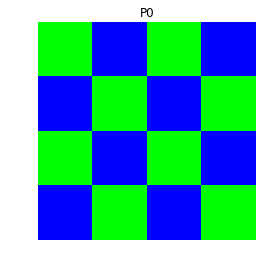

In [66]:
#2. Create a single 4x4 checkerboard pattern.

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
plot_tools.plot_pattern_list(pattern_list)

In [67]:
#3. store the checkerboard in the network

hopfield_net.store_patterns(pattern_list) 

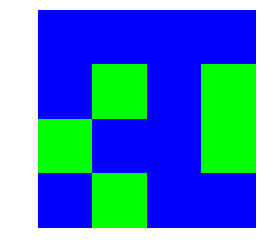

In [68]:
#4. set initial state of the network to a noisy version of checkerboard

noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
hopfield_net.set_state_from_pattern(noisy_init_state)
plot_tools.plot_pattern(hopfield_net.state.reshape(4, 4))

In [69]:
#5. Let the network dynamics evolve for 4 iterations.

states = hopfield_net.run_with_monitoring(nr_steps=4)  # apply equation S_i
states_as_patterns = factory.reshape_patterns(states)

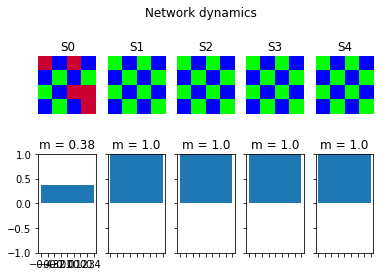

In [71]:
#6. Plot the sequence of network states along with the overlap of network state with the checkerboard.

plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


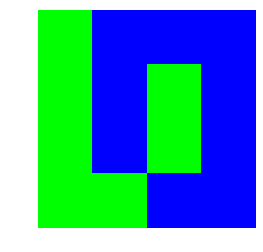

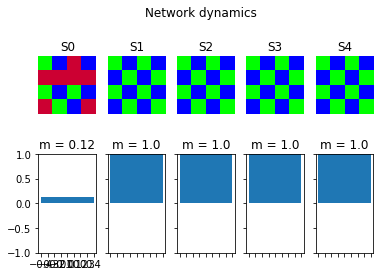

In [80]:
#7. Increase the flipped pixels

noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=7)
hopfield_net.set_state_from_pattern(noisy_init_state)
plot_tools.plot_pattern(hopfield_net.state.reshape(4, 4))
states = hopfield_net.run_with_monitoring(nr_steps=4)  # apply equation S_i
states_as_patterns = factory.reshape_patterns(states)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

#for 7 flips it works, for 8 or more flips it won't work anymore


**The weights matrix.**

The patterns a Hopfield network learns are not stored explicitly. Instead, the network learns by adjusting the weights to the pattern set it is presented during learning. Let's visualize this.

8.  Create a new 4x4 network. Do not yet store any pattern.
9.  What is the size of the network matrix?
10.  Visualize the weight matrix using the function .plot\_tools.plot\_nework\_weights. It takes the network as a parameter.
11.  Create a checkerboard, store it in the network.
12.  Plot the weights matrix. What weight values do occur?
13.  Create a new 4x4 network
14.  Create an L-shaped pattern (look at the pattern factory doc), store it in the network
15.  Plot the weights matrix. What weight values do occur?
16.  Create a new 4x4 network
17. Create a checkerboard and an L-shaped pattern. Store **both** patterns in the network
18. Plot the weights matrix. What weight values do occur? How does this matrix compare to the two previous matrices?

The mapping of the 2 dimensional patterns onto the one dimensional list of network neurons is internal to the implementation of the network. You cannot know which pixel (x,y) in the pattern corresponds to which network neuron i.

**Weights Distribution.**

19. It's interesting to look at the weights distribution in the three previous cases. You can easily plot a histogram by adding the following two lines to your script. It assumes you have stored your network in the variable 'hopfield\_net'.

``` sourceCode
plt.figure()
plt.hist(hopfield_net.weights.flatten())
```

## Exercise 3 - Capacity of an N=100 Hopfield-network

Larger networks can store more patterns. There is a theoretical limit: the capacity of the Hopfield network. Read [chapter "17.2.4 Memory capacity"](http://neuronaldynamics.epfl.ch/online/Ch17.S2.html) to learn how memory retrieval, pattern completion and the network capacity are related.

1. A Hopfield network implements so called **associative** or **content-adressable** memory. Explain what this means.

2. Using the value $C_\text{store}$ given in the book, how many patterns can you store in a N=10x10 network? Use this number **K** in the next question.

3. Create an N=10x10 network and store a checkerboard pattern together with **(K-1) random patterns**. Then initialize the network with the **unchanged** checkerboard pattern. Let the network evolve for five iterations. Rerun your script a few times. What do you observe?

## Exercise 4 - Non-random patterns

In the previous exercises we used random patterns. Now we use a list of structured patterns: the letters A to Z. Each letter is represented in a 10 by 10 grid.

<img src=https://neuronaldynamics-exercises.readthedocs.io/en/latest/_images/HF_LetterAandOverlap.png width="500">
<i><center>Eight letters (including 'A') are stored in a Hopfield network. The letter 'A' is not recovered.</center></i>

1. Run the following code. Read the inline comments and look up the doc of functions you do not know.

2. Add the letter 'R' to the letter list and store it in the network. Is the pattern 'A' still a fixed point? Does the overlap between the network state and the reference pattern 'A' always decrease?

3. Make a guess of how many letters the network can store. Then create a (small) set of letters. Check if **all** letters of your list are fixed points under the network dynamics. Explain the discrepancy between the network capacity C (computed above) and your observation.

## Exercise 5 - Bonus

The implementation of the Hopfield Network in `hopfield_network.network` offers a possibility to provide a custom update function `HopfieldNetwork.set_dynamics_to_user_function()`. 

1. Have a look at the source code of `HopfieldNetwork.set_dynamics_sign_sync()` to learn how the update dynamics are implemented. Then try to implement your own function. For example, you could implement an asynchronous update with stochastic neurons.